In [109]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
# Grab and process the raw data.
data_path = "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/sms_spam_collection/SMSSpamCollection"

sms_raw = pd.read_csv(data_path, delimiter='\t', header=None)
sms_raw.columns = ['spam', 'message']

sms_raw.head(3)

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [111]:
keywords = ['click', 'offer', 'buy', 'free', 'cash', 'urgent', 'win', 'now', 'xxx', 'important']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word, not just pattern matching.
    # Carl removed the ` + ' '`. This was causing words like "urgent!" from being ignored
    sms_raw[key] = sms_raw.message.str.contains(key, case=False)


In [112]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()
sms_raw.head(3)

,spam,message,click,offer,buy,free,cash,urgent,win,now,xxx,important,allcaps
0,ham,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False,False,False,False,False,False
1,ham,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False,False,False,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,False,True,False,False,True,False,False,False,False


In [113]:
sms_raw['spam_bool'] = (sms_raw['spam'] == 'spam')

In [114]:
sms_raw.head(3)

,spam,message,click,offer,buy,free,cash,urgent,win,now,xxx,important,allcaps,spam_bool
0,ham,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False,False,False,False,False,False,False
1,ham,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False,False,False,False,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,False,True,False,False,True,False,False,False,False,True


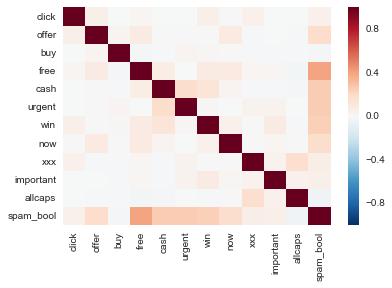

In [115]:
sns.heatmap(sms_raw.corr())

In [116]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam_bool']

In [117]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)
sms_raw["prediction"] = y_pred

# Display our results.
print("Number of mislabeled points out of a total {} points: {}".format( data.shape[0], (target != y_pred).sum() ))

Number of mislabeled points out of a total 5572 points: 502


In [118]:
sms_raw[sms_raw["prediction"] != sms_raw["spam_bool"]]

,spam,message,click,offer,buy,free,cash,urgent,win,now,xxx,important,allcaps,spam_bool,prediction
8,spam,WINNER!! As a valued network customer you have...,False,False,False,False,False,False,True,False,False,False,False,True,False
19,spam,England v Macedonia - dont miss the goals/team...,False,False,False,False,False,False,False,False,False,False,False,True,False
34,spam,Thanks for your subscription to Ringtone UK yo...,False,False,False,False,False,False,False,False,False,False,False,True,False
53,ham,Wow. I never realized that you were so embaras...,False,True,False,False,False,False,False,False,False,False,False,False,True
54,spam,SMS. ac Sptv: The New Jersey Devils and the De...,False,False,False,False,False,False,True,False,False,False,False,True,False
65,spam,"As a valued customer, I am pleased to advise y...",False,False,False,False,False,False,True,False,False,False,False,True,False
68,spam,"Did you hear about the new ""Divorce Barbie""? I...",False,False,False,False,False,False,False,False,False,False,False,True,False
75,ham,I am waiting machan. Call me once you free.,False,False,False,True,False,False,False,False,False,False,False,False,True
87,ham,Yes I started to send requests to make it but ...,False,False,False,False,True,False,False,False,False,False,False,False,True
89,ham,"Ela kano.,il download, come wen ur free..",False,False,False,True,False,False,False,False,False,False,False,False,True
